# Visualizing Batch Normalization

3.3%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




100.0%

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw




100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



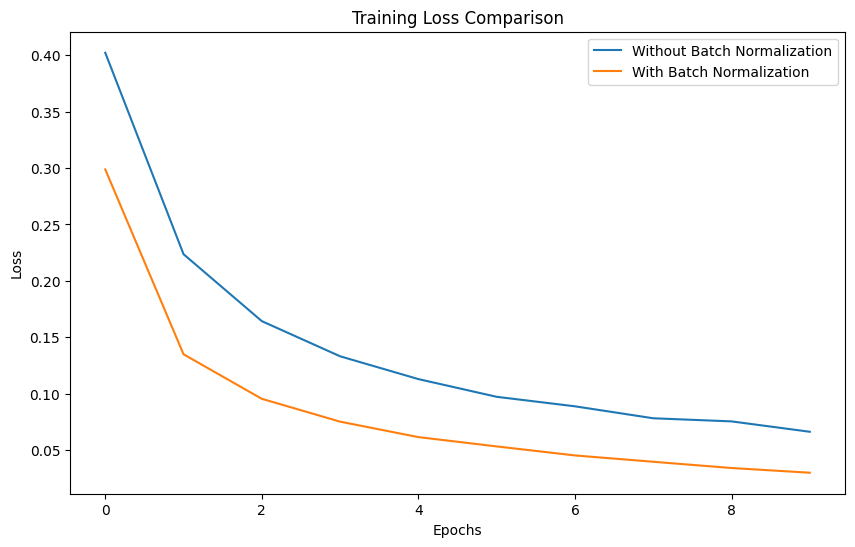

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Compose transforms: convert to tensor and normalize images

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Download and load the MNIST training dataset with specified transforms

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# DataLoader to iterate over the dataset in batches of size 64, shuffling the data for each epoch

# Define a simple neural network, optionally using batch normalization
class SimpleNet(nn.Module):
    def __init__(self, use_batch_norm=False):
        super(SimpleNet, self).__init__()
        self.use_batch_norm = use_batch_norm
        self.fc1 = nn.Linear(28*28, 100)
        # First fully connected layer (input size is 28*28, output size is 100)

        self.bn1 = nn.BatchNorm1d(100)
        # Batch normalization layer for 100 features

        self.fc2 = nn.Linear(100, 10)
        # Second fully connected layer (input size is 100, output size is 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        # Flatten the input image to a vector

        x = self.fc1(x)
        # Apply the first fully connected layer

        if self.use_batch_norm:
            x = self.bn1(x)
        # Apply batch normalization if enabled

        x = torch.relu(x)
        # Apply ReLU activation function

        x = self.fc2(x)
        # Apply the second fully connected layer

        return x

# Initialize two models
model_without_bn = SimpleNet(use_batch_norm=False)
# Initialize the model without batch normalization

model_with_bn = SimpleNet(use_batch_norm=True)
# Initialize the model with batch normalization

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
# Loss function for classification

optimizer_without_bn = optim.Adam(model_without_bn.parameters(), lr=0.001)
# Optimizer for the model without batch normalization

optimizer_with_bn = optim.Adam(model_with_bn.parameters(), lr=0.001)
# Optimizer for the model with batch normalization

# Training function
def train(model, optimizer, epochs=10):
    model.train()
    # Set the model to training mode

    losses = []
    # List to store loss values

    for epoch in range(epochs):
        # Iterate over the number of epochs

        running_loss = 0.0
        # Variable to accumulate loss

        for i, data in enumerate(trainloader, 0):
            # Iterate over the training data

            inputs, labels = data
            # Unpack the data into inputs and labels

            optimizer.zero_grad()
            # Zero the parameter gradients

            outputs = model(inputs)
            # Forward pass: compute the model output

            loss = criterion(outputs, labels)
            # Compute the loss

            loss.backward()
            # Backward pass: compute gradient of the loss with respect to model parameters

            optimizer.step()
            # Perform a single optimization step (parameter update)

            running_loss += loss.item()
            # Accumulate the loss

        losses.append(running_loss / len(trainloader))
        # Store the average loss for this epoch

    return losses

# Train both models
loss_without_bn = train(model_without_bn, optimizer_without_bn)
# Train the model without batch normalization

loss_with_bn = train(model_with_bn, optimizer_with_bn)
# Train the model with batch normalization

# Plot the training losses
plt.figure(figsize=(10, 6))
plt.plot(loss_without_bn, label='Without Batch Normalization')
plt.plot(loss_with_bn, label='With Batch Normalization')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Plotting the comparison of training losses